<a href="https://colab.research.google.com/github/joshi14/Detection_of_Covid-19_Arabic_Tweets/blob/main/Tweet_Arabia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Detection of Covid-19 Arabic Tweets**

**Importing the Libraries**

In [ ]:
# installing camel tools as it is an open source toolkit for Arabic NLP(Natural Language prcessing)
! pip install camel-tools

     |████████████████████████████████| 58 kB 2.2 MB/s 
     |████████████████████████████████| 3.5 MB 7.5 MB/s 
     |████████████████████████████████| 418 kB 31.6 MB/s 
     |████████████████████████████████| 6.8 MB 34.6 MB/s 
     |████████████████████████████████| 67 kB 3.1 MB/s 
     |████████████████████████████████| 895 kB 34.0 MB/s 
     |████████████████████████████████| 596 kB 46.3 MB/s 
  Created wheel for camel-tools: filename=camel_tools-1.2.0-py3-none-any.whl size=99048 sha256=0672838d935c1c8acf49d1a9421c2262048e813baf1b1098d6ee56bd8d81d2fe
  Stored in directory: /root/.cache/pip/wheels/05/ad/a1/e8aa569c102f0b8b3522ae515b7d0696046e4490c0ff4edb0a
  Created wheel for camel-kenlm: filename=camel_kenlm-2021.12.27-cp37-cp37m-linux_x86_64.whl size=2335438 sha256=b141e4891476cc2556adbcbe4798848ed1759b02d7dc7931152fb2bf302ff2fb
  Stored in directory: /root/.cache/pip/wheels/db/72/74/982f8c435f15b7feaf6dc8a03e212ff34e93f1f2d747059332
Successfully built camel-tools camel-kenlm
  At

In [ ]:
# Installing emoji module
! pip install emoji

     |████████████████████████████████| 174 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5594f77873f8586a4aa16260ddb2f0fb32427871d1a600a11851537cc6b406a3
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=a32b155ca8ad0d372261bb62d185d9cc1b39ec39b14243523367b2f14c5efbba
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
pip install nltk

In [ ]:
from camel_tools.tokenizers import word       # To tokenize a word in Arabic we are importing word from camel_tools.tokenizers. 
import pandas as pd                           # We use pandas as it is easy to use data structutres and data analysis tools for python language
import re                                     # We are importing re to indicate special forms or to allow special characters 
import emoji                                  # We are importing emoji to remove the emojis from the tweets
from sklearn.feature_extraction.text import TfidfVectorizer
                                              # TF-IDF stands for “Term Frequency — Inverse Document Frequency”.
                                              # TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow us to encode new documents
from sklearn.decomposition import TruncatedSVD# Here we importing TruncatedSVD to reduce dimensionality
import numpy as np                            # We use numpy as it contains many mathematical operations,multidimensional array etc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import stop_words
from plotly import graph_objs as go
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score

## Train Data

**Reading Data**

In [ ]:
# read_csv is an pandas function it is to read csv files and do operations on it1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Arabic_Tweets.csv")

**Displaying Data**


In [ ]:
df

,Tweet Number,Nature,Tweet
0,1,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,2,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,3,pos,من الخير نفسه 💛
3,4,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,5,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...,...
45269,45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45270,45271,neg,احسدك على الايم 💔
45271,45272,neg,لأول مرة ما بنكون سوا 💔
45272,45273,neg,بقله ليش يا واطي 🤔


In [ ]:
df.head()

,Tweet Number,Nature,Tweet
0,1,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,2,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,3,pos,من الخير نفسه 💛
3,4,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,5,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [ ]:
df.shape

(45274, 3)

In [ ]:
df.info

<bound method DataFrame.info of        Tweet Number Nature                                              Tweet
0                 1    pos  نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1                 2    pos  وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2                 3    pos                                    من الخير نفسه 💛
3                 4    pos  #زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4                 5    pos  الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...             ...    ...                                                ...
45269         45270    neg  كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45270         45271    neg                                  احسدك على الايم 💔
45271         45272    neg                            لأول مرة ما بنكون سوا 💔
45272         45273    neg                                 بقله ليش يا واطي 🤔
45273         45274    neg  قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...

[45274 rows x 3 columns]>

In [ ]:
df.describe()

,Tweet Number
count,45274.00000
mean,22637.50000
std,13069.62238
min,1.00000
25%,11319.25000
50%,22637.50000
75%,33955.75000
max,45274.00000


## **Preprocessing**


1.   Removing non Arabic and special characters. 
2.   Tokenising the tweets.
3.   Removing stop words(insignificant Arabic words)


In [ ]:
# we are creating a function called clean data.In this we are passing parameters tweets and stops.
# We have created this function to remove english text,punctuation and numbers.
import string
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
punctuations = string.punctuation
def clean_data(tweets,stops):
    tweet_after_cleaning=[]
    for tweet in tweets:
        tweet = re.sub(r"['A-Za-z0-9'\W+''_']+"," ", tweet)
        tweet = re.sub(emoji.get_emoji_regexp(), r"", tweet)
    
    # remove Tashkeel
        tweet = re.sub(arabic_diacritics, '', tweet)
    
    #remove elongation
        tweet = re.sub("[إأآا]", "ا", tweet)
        tweet = re.sub("ى", "ي", tweet)
        tweet = re.sub("ؤ", "ء", tweet)
        tweet = re.sub("ئ", "ء", tweet)
        tweet = re.sub("ة", "ه", tweet)
        tweet = re.sub("گ", "ك", tweet)


        #return tweet
        tweet_tokens=word.simple_word_tokenize(tweet) # tokenizing the tweets
        temp=[]
        for tweet_token in tweet_tokens:
            if not tweet_token in stops:
                temp.append(tweet_token)
        tweet = " ".join(temp)
        tweet_after_cleaning.append(tweet)
        tweet_tokens
    return tweet_after_cleaning

In [ ]:
# It is a pandas function to turn a HTML table into pandas dataframes.
url = 'https://1000mostcommonwords.com/1000-most-common-arabic-words/'
df1 = pd.read_html(url)

In [ ]:
df1[0][1]

0       Arabic
1          كما
2          أنا
3           له
4           أن
         ...  
996      الأنف
997      الجمع
998        غضب
999     مطالبة
1000    القارة
Name: 1, Length: 1001, dtype: object

In [ ]:
#We are converting to list and storing it in variable stops 
stops = df1[0][1].tolist()
stops[0]

'Arabic'

In [ ]:
#We are removing the header word Arabic as it is in english
stops.remove("Arabic")
# We are appending "COVIDー" and "Covid as most common words
stops.append("COVID")
stops.append("Covid")

In [ ]:
for i in range (-2,10):
  print(stops[i])

COVID
Covid
كما
أنا
له
أن
هو
كان
إلى
في
هي
مع


In [ ]:
#We are printing the most common arabic words and its meaning in english in the table
print("Most Common Arabic Words\n",df1)

Most Common Arabic Words
 [           0       1           2
0     Number  Arabic  in English
1          1     كما          as
2          2     أنا           I
3          3      له         his
4          4      أن        that
...      ...     ...         ...
996      996   الأنف        nose
997      997   الجمع      plural
998      998     غضب       anger
999      999  مطالبة       claim
1000    1000  القارة   continent

[1001 rows x 3 columns]]


In [ ]:
#calling the function clean_data
df['tweet1']=clean_data(df['Tweet'],stops)  #To improve the data quality we are cleaning the data
clean_tweets=clean_data(df['Tweet'],stops)

In [ ]:
df

,Tweet Number,Nature,Tweet,tweet1
0,1,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,الذين يتحول نود ان نقوله الي دعاء لله تبحثوا ف...
1,2,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي النهايه لن يبقي معك احدالا راي روحك اماالم...
2,3,pos,من الخير نفسه 💛,الخير
3,4,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل الملعب نصرنا بيلعب كن عالي الهمه ترضي بغي...
4,5,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,الشيء الوحيد وصلوا فيه للعالميه المسيار تري كا...
...,...,...,...,...
45269,45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...,تري اورانوس لو يقع القمر بعدا عن الشمس يبلغ قط...
45270,45271,neg,احسدك على الايم 💔,احسدك علي الايم
45271,45272,neg,لأول مرة ما بنكون سوا 💔,لاول مره بنكون سوا
45272,45273,neg,بقله ليش يا واطي 🤔,بقله ليش واطي


In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
  return [lemmatizer.lemmatize(word,'v') for word in w_tokenizer.tokenize(text)]

In [ ]:
df['Processed_text']=df.tweet1.apply(lemmatize_text)
df

,Tweet Number,Nature,Tweet,tweet1,Processed_text
0,1,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,الذين يتحول نود ان نقوله الي دعاء لله تبحثوا ف...,"[الذين, يتحول, نود, ان, نقوله, الي, دعاء, لله,..."
1,2,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي النهايه لن يبقي معك احدالا راي روحك اماالم...,"[وفي, النهايه, لن, يبقي, معك, احدالا, راي, روح..."
2,3,pos,من الخير نفسه 💛,الخير,[الخير]
3,4,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل الملعب نصرنا بيلعب كن عالي الهمه ترضي بغي...,"[زلزل, الملعب, نصرنا, بيلعب, كن, عالي, الهمه, ..."
4,5,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,الشيء الوحيد وصلوا فيه للعالميه المسيار تري كا...,"[الشيء, الوحيد, وصلوا, فيه, للعالميه, المسيار,..."
...,...,...,...,...,...
45269,45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...,تري اورانوس لو يقع القمر بعدا عن الشمس يبلغ قط...,"[تري, اورانوس, لو, يقع, القمر, بعدا, عن, الشمس..."
45270,45271,neg,احسدك على الايم 💔,احسدك علي الايم,"[احسدك, علي, الايم]"
45271,45272,neg,لأول مرة ما بنكون سوا 💔,لاول مره بنكون سوا,"[لاول, مره, بنكون, سوا]"
45272,45273,neg,بقله ليش يا واطي 🤔,بقله ليش واطي,"[بقله, ليش, واطي]"



## **Processing** 
 1.   Tf-Idf Vectorization
 2.   Performing SVD to reduce matrix dimension
 3.   Label Encoding 


**Tf-Idf** 
  
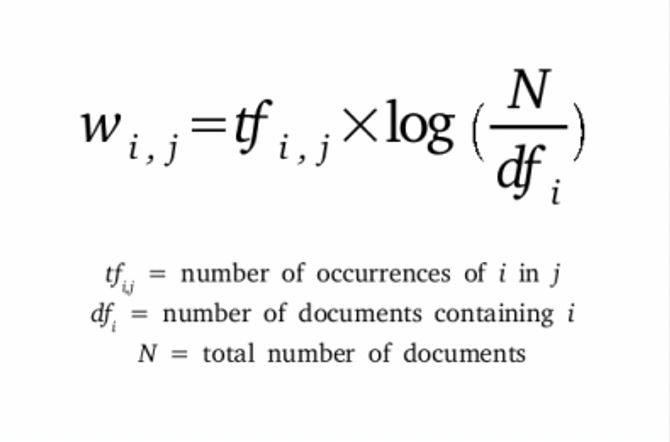


**Truncated SVD**

Till now, we saw that singular value decomposition breaks any matrix A down so that A = U*Sigmal*V^T.

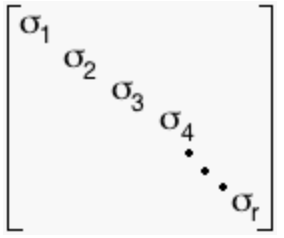

Where,

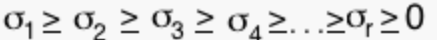

are the singular values of the matrix A with rank r.


We can find truncated SVD to A by setting all but the first k largest singular values equal to zero and using only the first k columns of U and V.

In [ ]:
def processing(Processed_text):
    tv = TfidfVectorizer(stop_words=stops)    
    tv_score = tv.fit_transform(Processed_text)    
    print("Shape of TF-IDF matrix :",np.shape(tv_score))
                                                        # We used TruncatedSVD which is different from normal svd.
                                                        # Because Svd will produce matrix with n coloumns where truncated SVD will produce matrices with the specified number of columns.
    svd = TruncatedSVD(n_components=20, random_state=42)                    
    X = svd.fit_transform(tv_score)                       
    print("Shape of TF-IDF matrix after performing SVD :",np.shape(X)) #shape of the matrix after reduction
    return X


In [ ]:
df=df.replace('pos',1)        # replacing Positive values with 1 
df=df.replace('neg', 0)      # replacing Negative values with 0
df


,Tweet Number,Nature,Tweet,tweet1,Processed_text
0,1,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...,الذين يتحول نود ان نقوله الي دعاء لله تبحثوا ف...,"[الذين, يتحول, نود, ان, نقوله, الي, دعاء, لله,..."
1,2,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...,وفي النهايه لن يبقي معك احدالا راي روحك اماالم...,"[وفي, النهايه, لن, يبقي, معك, احدالا, راي, روح..."
2,3,1,من الخير نفسه 💛,الخير,[الخير]
3,4,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...,زلزل الملعب نصرنا بيلعب كن عالي الهمه ترضي بغي...,"[زلزل, الملعب, نصرنا, بيلعب, كن, عالي, الهمه, ..."
4,5,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...,الشيء الوحيد وصلوا فيه للعالميه المسيار تري كا...,"[الشيء, الوحيد, وصلوا, فيه, للعالميه, المسيار,..."
...,...,...,...,...,...
45269,45270,0,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...,تري اورانوس لو يقع القمر بعدا عن الشمس يبلغ قط...,"[تري, اورانوس, لو, يقع, القمر, بعدا, عن, الشمس..."
45270,45271,0,احسدك على الايم 💔,احسدك علي الايم,"[احسدك, علي, الايم]"
45271,45272,0,لأول مرة ما بنكون سوا 💔,لاول مره بنكون سوا,"[لاول, مره, بنكون, سوا]"
45272,45273,0,بقله ليش يا واطي 🤔,بقله ليش واطي,"[بقله, ليش, واطي]"


In [ ]:
y =df[['Nature']]                                                                 # selecting columns with label values
X=processing(clean_tweets)                                                        # Processing - to get tf-idf matrix and reduce the dimension
X

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['covid', 'أخرى', 'إطار', 'الأمام', 'الإدارة', 'الحرارة', 'الحصول', 'الرغم', 'الساعة', 'العجلة', 'القمر', 'الكفاية', 'بصوت', 'بما', 'تحتوي', 'جمال', 'حديدية', 'حين', 'ربطة', 'سكة', 'عال', 'عنق', 'فيه', 'لفظي', 'لين', 'مبكر', 'مجلس', 'مدار', 'مرة', 'مقطع', 'ملكة', 'نطاق', 'واحدة', 'وقت', 'يزال'] not in stop_words.
  % sorted(inconsistent)


Shape of TF-IDF matrix : (45274, 62192)
Shape of TF-IDF matrix after performing SVD : (45274, 20)


array([[ 1.59142238e-02,  5.45685213e-03,  8.11727929e-02, ...,
         1.17590491e-02,  4.53405944e-02, -5.20463180e-03],
       [ 2.83279947e-03,  9.00168610e-04,  4.98655031e-03, ...,
         2.61676844e-03,  5.42842512e-03, -4.36165829e-03],
       [ 3.19460834e-01,  5.08602460e-01, -7.12158629e-02, ...,
         9.44122621e-02, -2.90513266e-02, -9.88786955e-02],
       ...,
       [ 1.31297853e-03,  1.08815764e-04,  2.72396117e-03, ...,
         1.89514395e-03,  3.79031306e-03, -3.26791834e-03],
       [ 8.77605148e-04,  3.33988490e-05,  1.81685628e-03, ...,
         1.89569661e-04,  1.17329874e-03, -3.13355427e-03],
       [ 7.53602013e-03,  2.18629317e-03,  2.93450113e-02, ...,
         5.82438109e-04,  2.75160038e-02, -1.10435596e-02]])

# **EDA**

In [ ]:
temp = df1.groupby('Nature').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Nature,Tweet
1,pos,22761
0,neg,22513


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


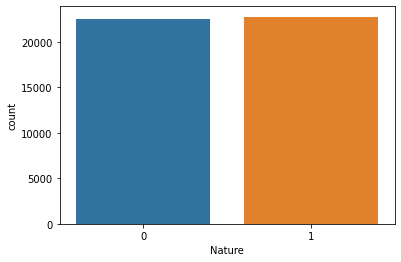

In [ ]:
sns.countplot(df['Nature'])

It is seen that there are almost equal number of positive and negative tweets.
The number of positive tweets is very slightly higher than the number of negative tweets.

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.Nature,
    values = temp.Tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
# splitting into train and tests
X_train,X_test,Y_train,Y_test = train_test_split(df['tweet1'], df.Nature, test_size=0.2, random_state=42)

In [ ]:
X_train.head

<bound method NDFrame.head of 4819                                        اجمل تعب والله
34195                                         نفس اللي طلع
30296    الهلال الاهلي حسين عبدالغني سبق وان تكررت لحال...
20679                                             وصلت وين
21444    اعتلي الهلال الدوري فالوقت الحالي مباراه النصر...
                               ...                        
11284    يلامسون قلبي اولءك الذين ينتبهون لتفاصيلي الصغ...
44732    الاس لاعب ريال مدريد بيل رفض حضور مادبه غداء ا...
38158    دوله يحكمها عقلاء دستورهم الكتاب والسنه تاخذهم...
860      بحياتك ولدي امراه عيناها سبحان المعبود فمها مر...
15795    بس احبها شخصيتها تجنن حلاوه الفلم نفس انتي حلا...
Name: tweet1, Length: 36219, dtype: object>

In [ ]:
Y_train.head

<bound method NDFrame.head of 4819     1
34195    0
30296    0
20679    1
21444    1
        ..
11284    1
44732    0
38158    0
860      1
15795    1
Name: Nature, Length: 36219, dtype: int64>

In [ ]:
AUC = {}
models = {}

A dictionary is created to keep track of models, auc score and accuracy

# **Classification Algorithms**

### **Confusion Matrix**

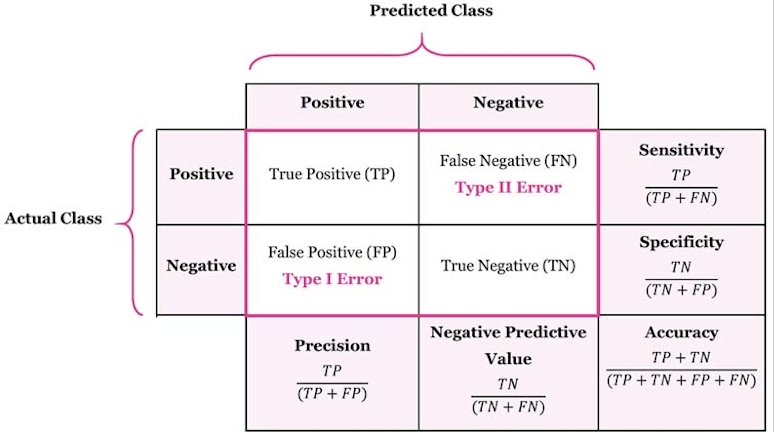



# **Training Models**

We have used:
1.   Logistic Regression
2.   Random Forest Classifier
3.   Decision Tree Classifier
4.   K-Nearest Neighbour
5.   Naive Bayes
        1. Bernoulli Naive Bayes
        2. Multinomial Naive Bayes
        3. Gaussian Naive Bayes
6.   Support Vector Machine
        1. Linear SVM
        2. Polynomial SVM
        3. Sigmoid SVM
        4. RBF Classifier




## Function **model_train**


For each of the label:

* It prints the confusion matrix.
* It prints the classification report.
* It plots the ROC AUC curve.
* It picks the classifier with the best accuracy score.





In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdYlGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)      #x axis
    plt.yticks(tick_marks, classes)                   #y axis

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Logistic Regression**

In [ ]:
# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())
pipe

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
param_grid

{'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [ ]:
# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(X_train,Y_train)

In [ ]:
# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.79
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4488
           1       0.80      0.78      0.79      4567

    accuracy                           0.79      9055
   macro avg       0.79      0.79      0.79      9055
weighted avg       0.79      0.79      0.79      9055



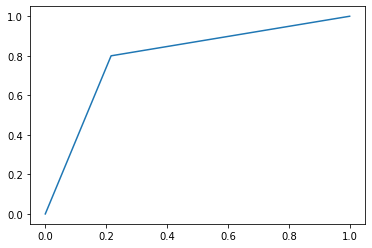

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score=roc_auc_score(prediction,Y_test)

In [ ]:
auc_score

0.7918171663186804

In [ ]:
AUC[1] =['Logistic regression', auc_score] 
AUC

{1: ['Logistic regression', 0.7918171663186804]}

In [ ]:
acc=accuracy_score(Y_test, prediction)

In [ ]:
models[1] =['Logistic Regression', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122]}

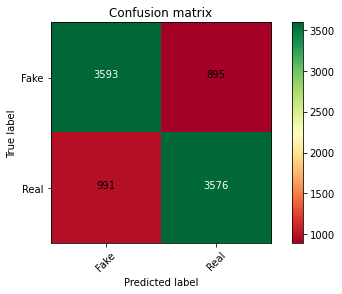

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest Classifier**

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(random_state=0))])
# Fitting the model
model = pipe.fit(X_train, Y_train)

In [ ]:
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.79
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4488
           1       0.83      0.75      0.78      4567

    accuracy                           0.79      9055
   macro avg       0.80      0.79      0.79      9055
weighted avg       0.80      0.79      0.79      9055



0.7955452701456757

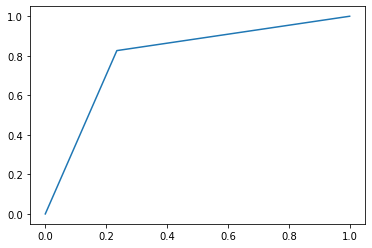

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score2=roc_auc_score(prediction,Y_test)
auc_score2

In [ ]:
AUC[2] =['Random Forest Classifier', auc_score2] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 2: ['Random Forest Classifier', 0.7955452701456757]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[2] =['Random Forest Classifier', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 2: ['Random Forest Classifier', 0.7928216454997239]}

Confusion matrix, without normalization


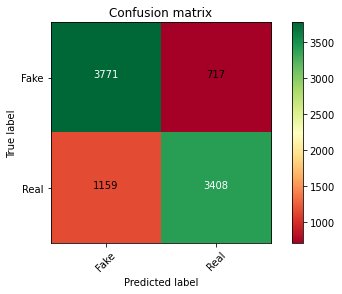

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, Y_train)

In [ ]:
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.64
              precision    recall  f1-score   support

           0       0.59      0.90      0.71      4488
           1       0.80      0.38      0.51      4567

    accuracy                           0.64      9055
   macro avg       0.69      0.64      0.61      9055
weighted avg       0.69      0.64      0.61      9055



0.690872204159315

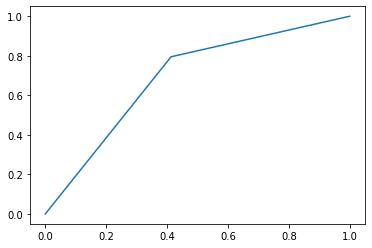

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score3=roc_auc_score(prediction,Y_test)
auc_score3

In [ ]:
AUC[3] =['Desicion Tree Classifier', auc_score3] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[3] =['Decision Tree Classifier', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863]}

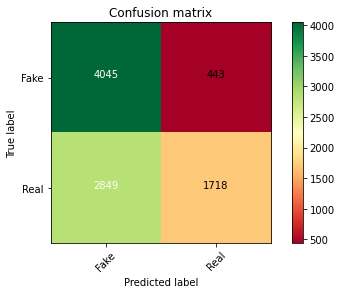

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 1))])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

In [ ]:
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(prediction,Y_test))

Accuracy score is 0.72
              precision    recall  f1-score   support

           0       0.51      0.88      0.64      2590
           1       0.93      0.66      0.77      6465

    accuracy                           0.72      9055
   macro avg       0.72      0.77      0.71      9055
weighted avg       0.81      0.72      0.74      9055



0.7693887789015399

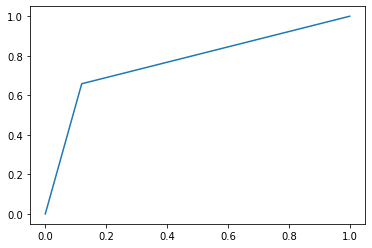

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score4=roc_auc_score(prediction,Y_test)
auc_score4

In [ ]:
AUC[4] =['K-Nearest Neighbour', auc_score4] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[4] =['K-Nearest Neighbour', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124]}

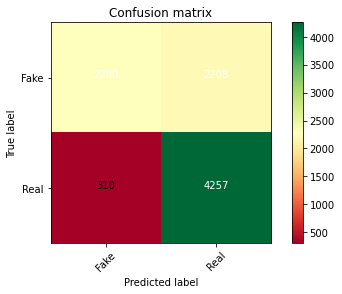

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Naive Bayes**

## **Bernoulli Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

In [ ]:
# Accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(prediction,Y_test))

Accuracy score is 0.78
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      5047
           1       0.72      0.82      0.77      4008

    accuracy                           0.78      9055
   macro avg       0.78      0.78      0.78      9055
weighted avg       0.79      0.78      0.78      9055



0.7836945239696947

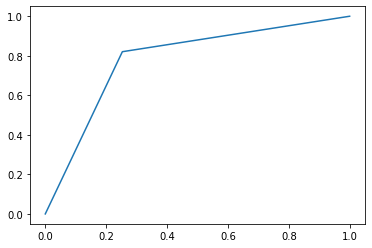

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score5=roc_auc_score(prediction,Y_test)
auc_score5

In [ ]:
AUC[5] =['Bernoulli Naive Bayes', auc_score5] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[5] =['Bernoulli Naive Bayes', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022]}

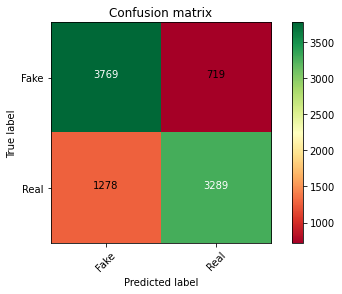

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 77.67%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4584
           1       0.77      0.78      0.78      4471

    accuracy                           0.78      9055
   macro avg       0.78      0.78      0.78      9055
weighted avg       0.78      0.78      0.78      9055



0.7767955006141968

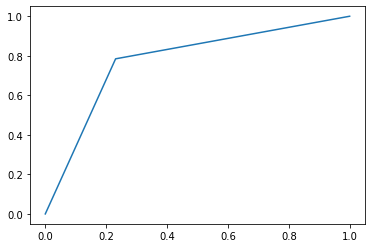

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score6=roc_auc_score(prediction,Y_test)
auc_score6

In [ ]:
AUC[6] =['Multinomial Naive Bayes', auc_score6] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[6] =['Multinomial Naive Bayes', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873]}

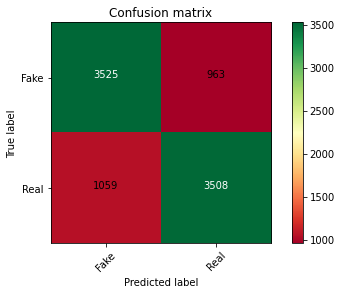

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 77.67%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4584
           1       0.77      0.78      0.78      4471

    accuracy                           0.78      9055
   macro avg       0.78      0.78      0.78      9055
weighted avg       0.78      0.78      0.78      9055



0.7767955006141968

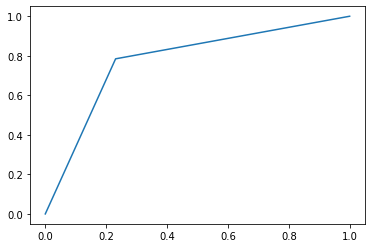

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score7=roc_auc_score(prediction,Y_test)
auc_score7

In [ ]:
AUC[7] =['Gaussian Naive Bayes', auc_score7] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968],
 7: ['Gaussian Naive Bayes', 0.7767955006141968]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[7] =['Gaussian Naive Bayes', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873],
 7: ['Gaussian Naive Bayes', 0.776697956929873]}

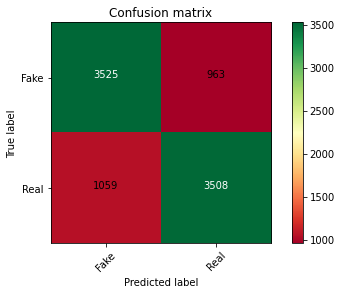

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Support Vector Machine(SVM)**

##**LINEAR**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='linear'))])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))


accuracy: 78.75%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      4736
           1       0.76      0.81      0.78      4319

    accuracy                           0.79      9055
   macro avg       0.79      0.79      0.79      9055
weighted avg       0.79      0.79      0.79      9055



0.7883330862843625

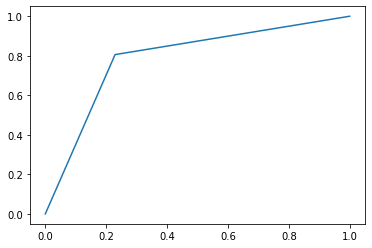

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score8=roc_auc_score(prediction,Y_test)
auc_score8

In [ ]:
AUC[8] =['Linear SVM', auc_score8] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968],
 7: ['Gaussian Naive Bayes', 0.7767955006141968],
 8: ['Linear SVM', 0.7883330862843625]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[8] =['Linear SVM', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873],
 7: ['Gaussian Naive Bayes', 0.776697956929873],
 8: ['Linear SVM', 0.7875207067918277]}

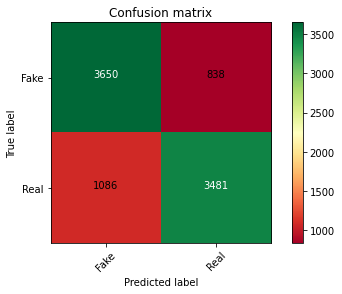

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##**POLYNOMIAL**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='poly'))])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))


accuracy: 78.96%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      5515
           1       0.68      0.88      0.77      3540

    accuracy                           0.79      9055
   macro avg       0.79      0.81      0.79      9055
weighted avg       0.81      0.79      0.79      9055



0.8050841054955413

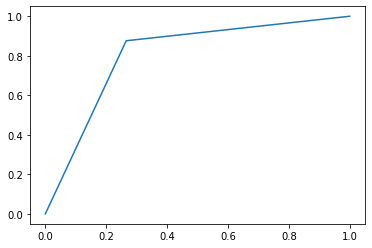

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score9=roc_auc_score(prediction,Y_test)
auc_score9

In [ ]:
AUC[9] =['Polynomial SVM', auc_score9] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968],
 7: ['Gaussian Naive Bayes', 0.7767955006141968],
 8: ['Linear SVM', 0.7883330862843625],
 9: ['Polynomial SVM', 0.8050841054955413]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[9] =['Polynomial SVM', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873],
 7: ['Gaussian Naive Bayes', 0.776697956929873],
 8: ['Linear SVM', 0.7875207067918277],
 9: ['Polynomial SVM', 0.7896189950303699]}

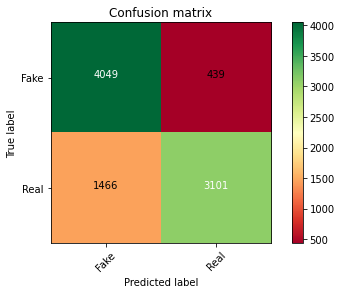

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##**SIGMOID**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='sigmoid'))])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))


accuracy: 76.89%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4851
           1       0.73      0.79      0.76      4204

    accuracy                           0.77      9055
   macro avg       0.77      0.77      0.77      9055
weighted avg       0.77      0.77      0.77      9055



0.7705499479150424

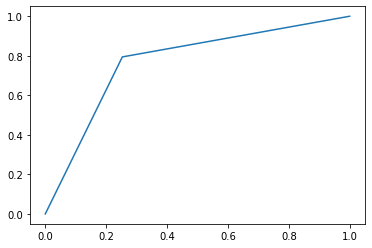

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score10=roc_auc_score(prediction,Y_test)
auc_score10

In [ ]:
AUC[10] =['Sigmoid SVM', auc_score10] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968],
 7: ['Gaussian Naive Bayes', 0.7767955006141968],
 8: ['Linear SVM', 0.7883330862843625],
 9: ['Polynomial SVM', 0.8050841054955413],
 10: ['Sigmoid SVM', 0.7705499479150424]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[10] =['Sigmoid SVM', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873],
 7: ['Gaussian Naive Bayes', 0.776697956929873],
 8: ['Linear SVM', 0.7875207067918277],
 9: ['Polynomial SVM', 0.7896189950303699],
 10: ['Sigmoid SVM', 0.7688569850911099]}

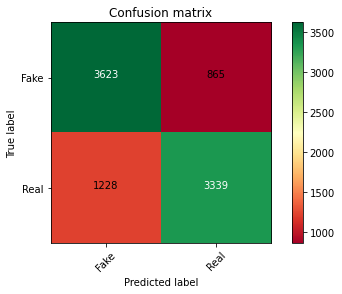

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##**RBF**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='rbf'))])  
# Fitting the model
model = pipe.fit(X_train, Y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 80.38%


In [ ]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4919
           1       0.76      0.84      0.80      4136

    accuracy                           0.80      9055
   macro avg       0.80      0.81      0.80      9055
weighted avg       0.81      0.80      0.80      9055



0.8064232687526321

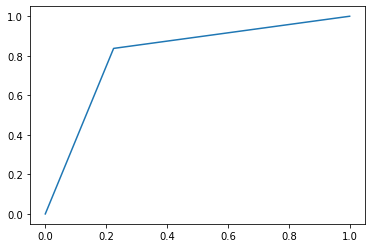

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,Y_test)
plt.plot(fpr,tpr)
auc_score11=roc_auc_score(prediction,Y_test)
auc_score11

In [ ]:
AUC[11] =['RBF Classifier', auc_score11] 
AUC

{1: ['Logistic regression', 0.7918171663186804],
 3: ['Desicion Tree Classifier', 0.690872204159315],
 4: ['K-Nearest Neighbour', 0.7693887789015399],
 5: ['Bernoulli Naive Bayes', 0.7836945239696947],
 6: ['Multinomial Naive Bayes', 0.7767955006141968],
 7: ['Gaussian Naive Bayes', 0.7767955006141968],
 8: ['Linear SVM', 0.7883330862843625],
 9: ['Polynomial SVM', 0.8050841054955413],
 10: ['Sigmoid SVM', 0.7705499479150424],
 11: ['RBF Classifier', 0.8064232687526321]}

In [ ]:
acc=accuracy_score(Y_test, prediction)
models[11] =['RBF Classifier', acc] 
models

{1: ['Logistic Regression', 0.7917172832689122],
 3: ['Decision Tree Classifier', 0.6364439536167863],
 4: ['K-Nearest Neighbour', 0.7219215902816124],
 5: ['Bernoulli Naive Bayes', 0.7794588625069022],
 6: ['Multinomial Naive Bayes', 0.776697956929873],
 7: ['Gaussian Naive Bayes', 0.776697956929873],
 8: ['Linear SVM', 0.7875207067918277],
 9: ['Polynomial SVM', 0.7896189950303699],
 10: ['Sigmoid SVM', 0.7688569850911099],
 11: ['RBF Classifier', 0.8037548315847598]}

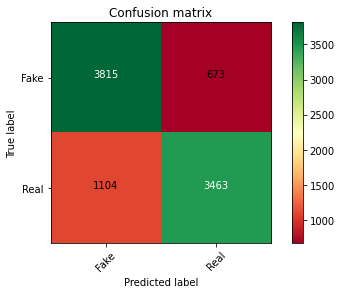

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Conclusion**

**It is seen that RBF Classifier predicts with better accuracy when compared to other models. So RBF Classifier model can be used for futurepredictions.**